In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# Load your dataset
data = pd.read_csv('./sarah_cleaned_output.csv')

# Define features and target variable
X = data[['calories','cholesterol']]
y = data['restaurant']  # Assuming 'restaurant_name' is the column containing restaurant names

# Preprocessing - scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.03331927456769296


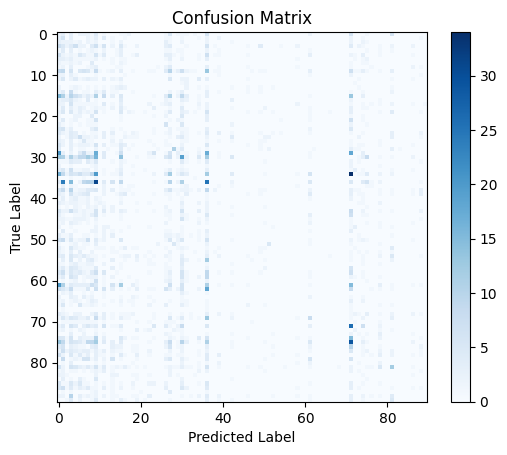

In [9]:

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [10]:
# Perform PCA for visualization
pca = PCA(n_components=2)  # Project to 2 dimensions for visualization
X_pca = pca.fit_transform(X)

# Plotting
plt.figure(figsize=(8, 6))

# Plot each class separately
for class_label in np.unique(y):
    X_class = X_pca[y == class_label]
    plt.scatter(X_class[:, 0], X_class[:, 1], label=f'Class {class_label}')

plt.title('Data Points Visualization (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

ValueError: n_components=2 must be between 0 and min(n_samples, n_features)=1 with svd_solver='full'

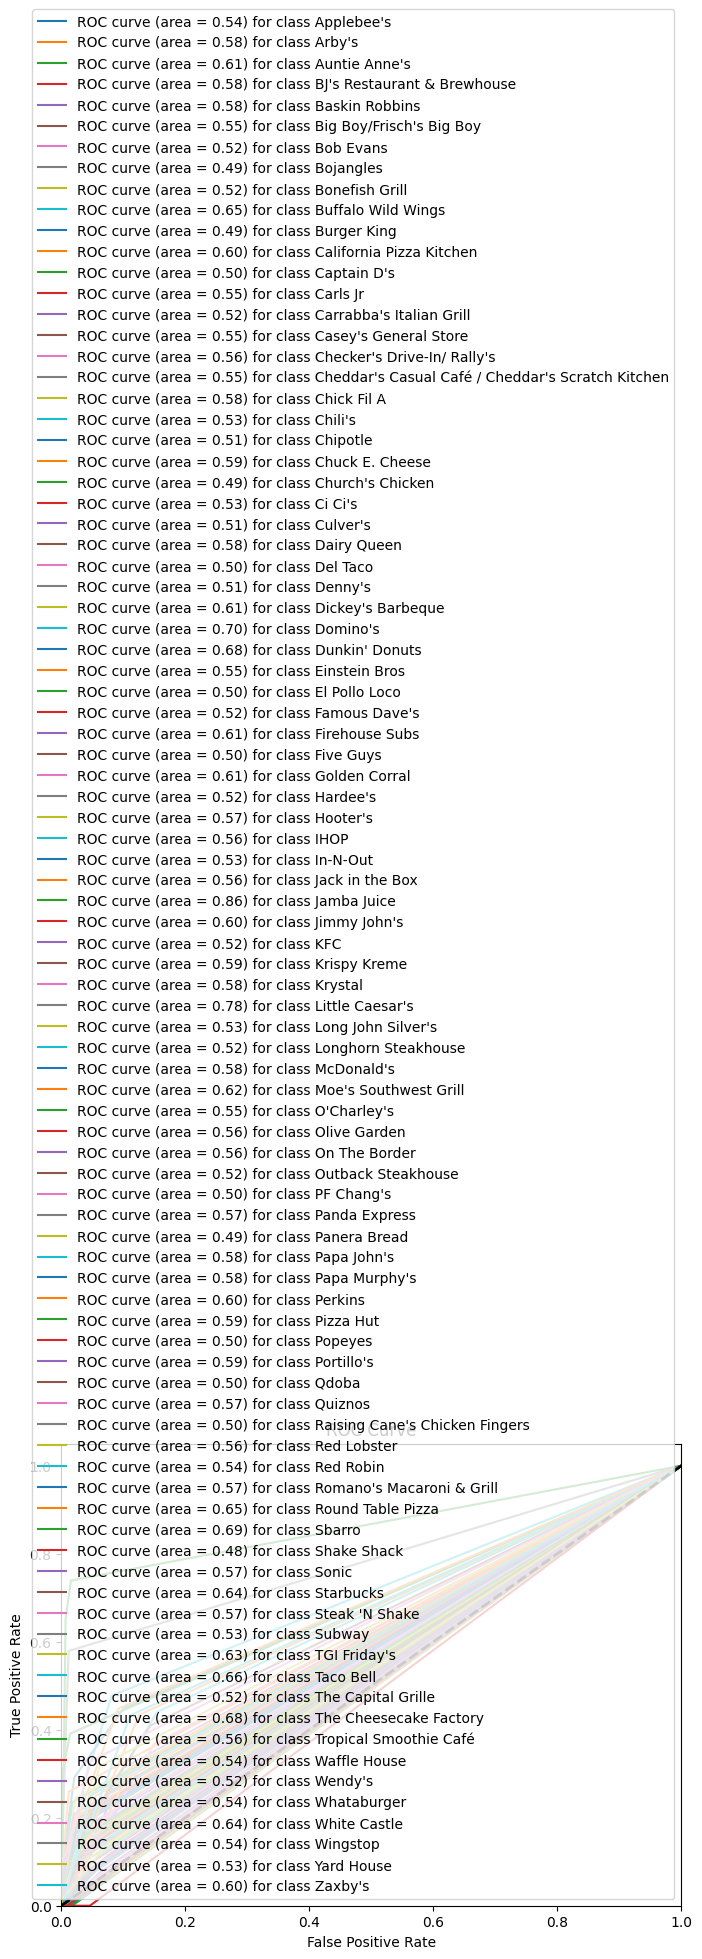

In [ ]:
from sklearn.metrics import roc_curve, auc

# Calculate probabilities for each class
y_probs = knn.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(knn.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test == knn.classes_[i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i in range(len(knn.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {knn.classes_[i]}')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

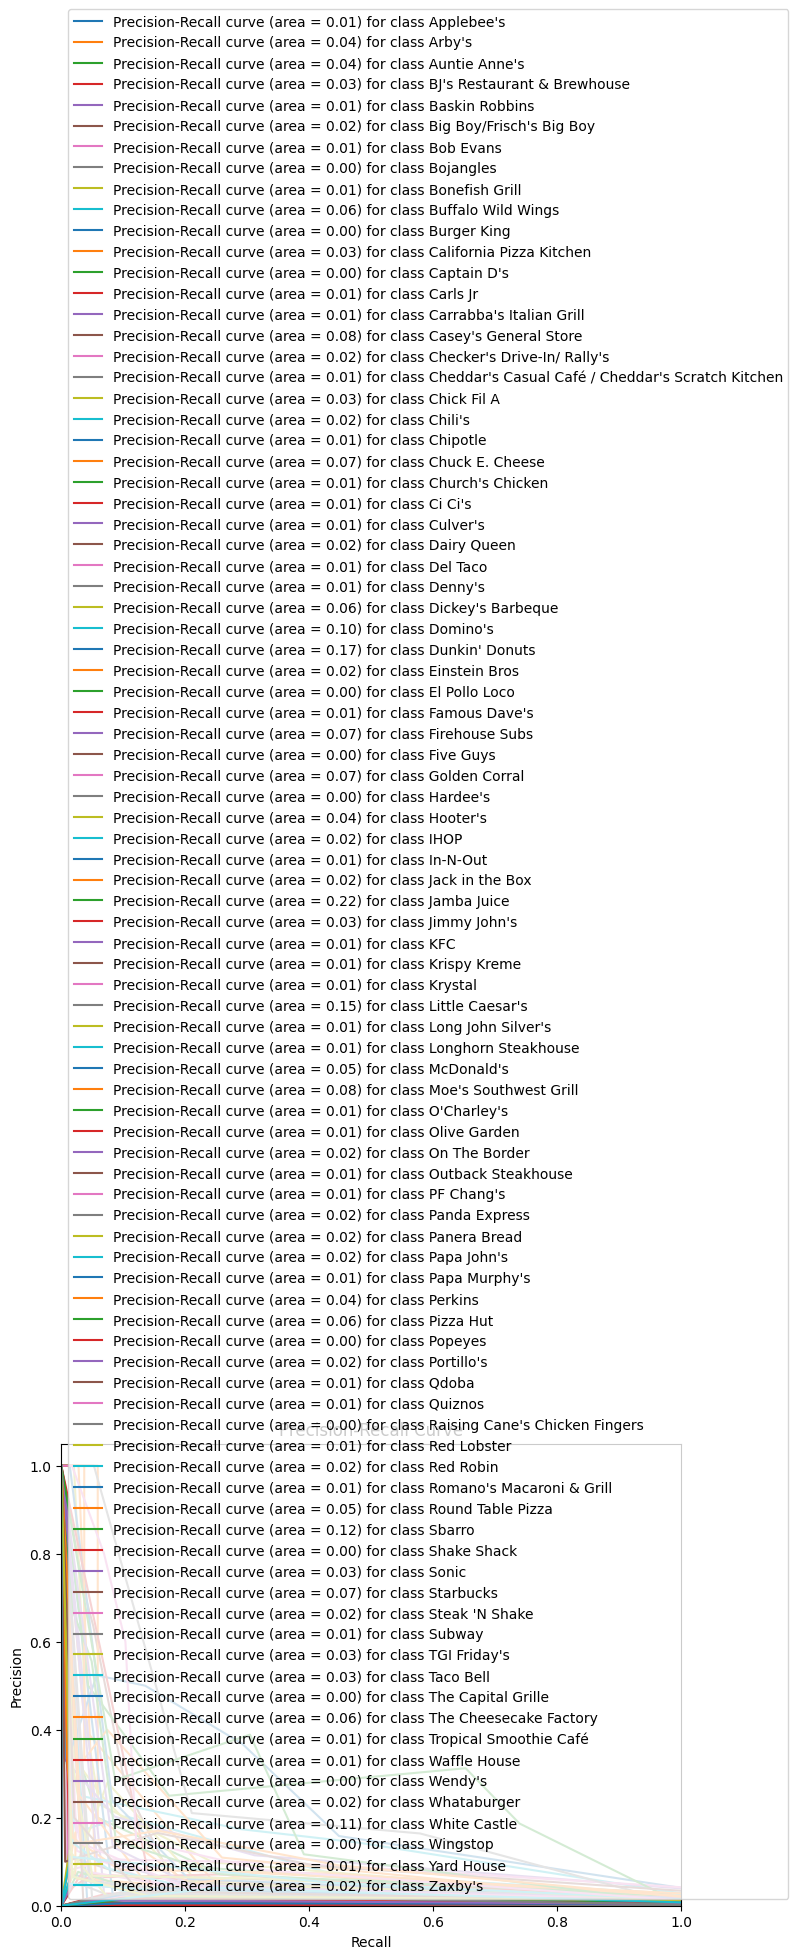

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Calculate probabilities for each class
y_probs = knn.predict_proba(X_test)

# Compute precision-recall curve and precision-recall area for each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(knn.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test == knn.classes_[i], y_probs[:, i])
    average_precision[i] = average_precision_score(y_test == knn.classes_[i], y_probs[:, i])

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
for i in range(len(knn.classes_)):
    plt.plot(recall[i], precision[i], label=f'Precision-Recall curve (area = {average_precision[i]:.2f}) for class {knn.classes_[i]}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (18967,) and arg 1 with shape (18967, 2).

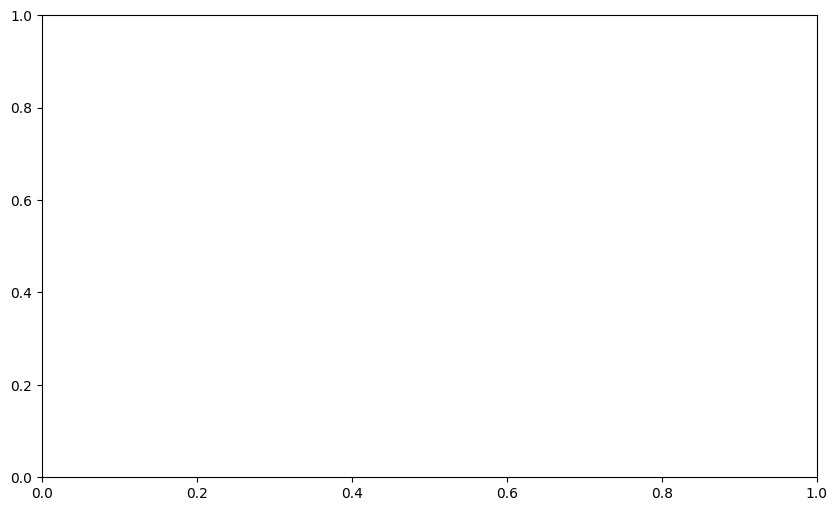

In [ ]:
# Get the average feature values for each class
class_feature_means = []
for class_label in knn.classes_:
    class_feature_means.append(X_train[y_train == class_label].mean(axis=0))

class_feature_means = np.array(class_feature_means)

# Ensure class_feature_means has the same shape as X_train for broadcasting
class_feature_means = class_feature_means[:, np.newaxis, :]

# Calculate the difference between each feature value and the class mean for each class
feature_importance = np.abs(X_train - class_feature_means).mean(axis=0)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance, align='center')
plt.xticks(range(len(feature_importance)), X.columns, rotation=45)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance in KNN Model')
plt.show()

/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


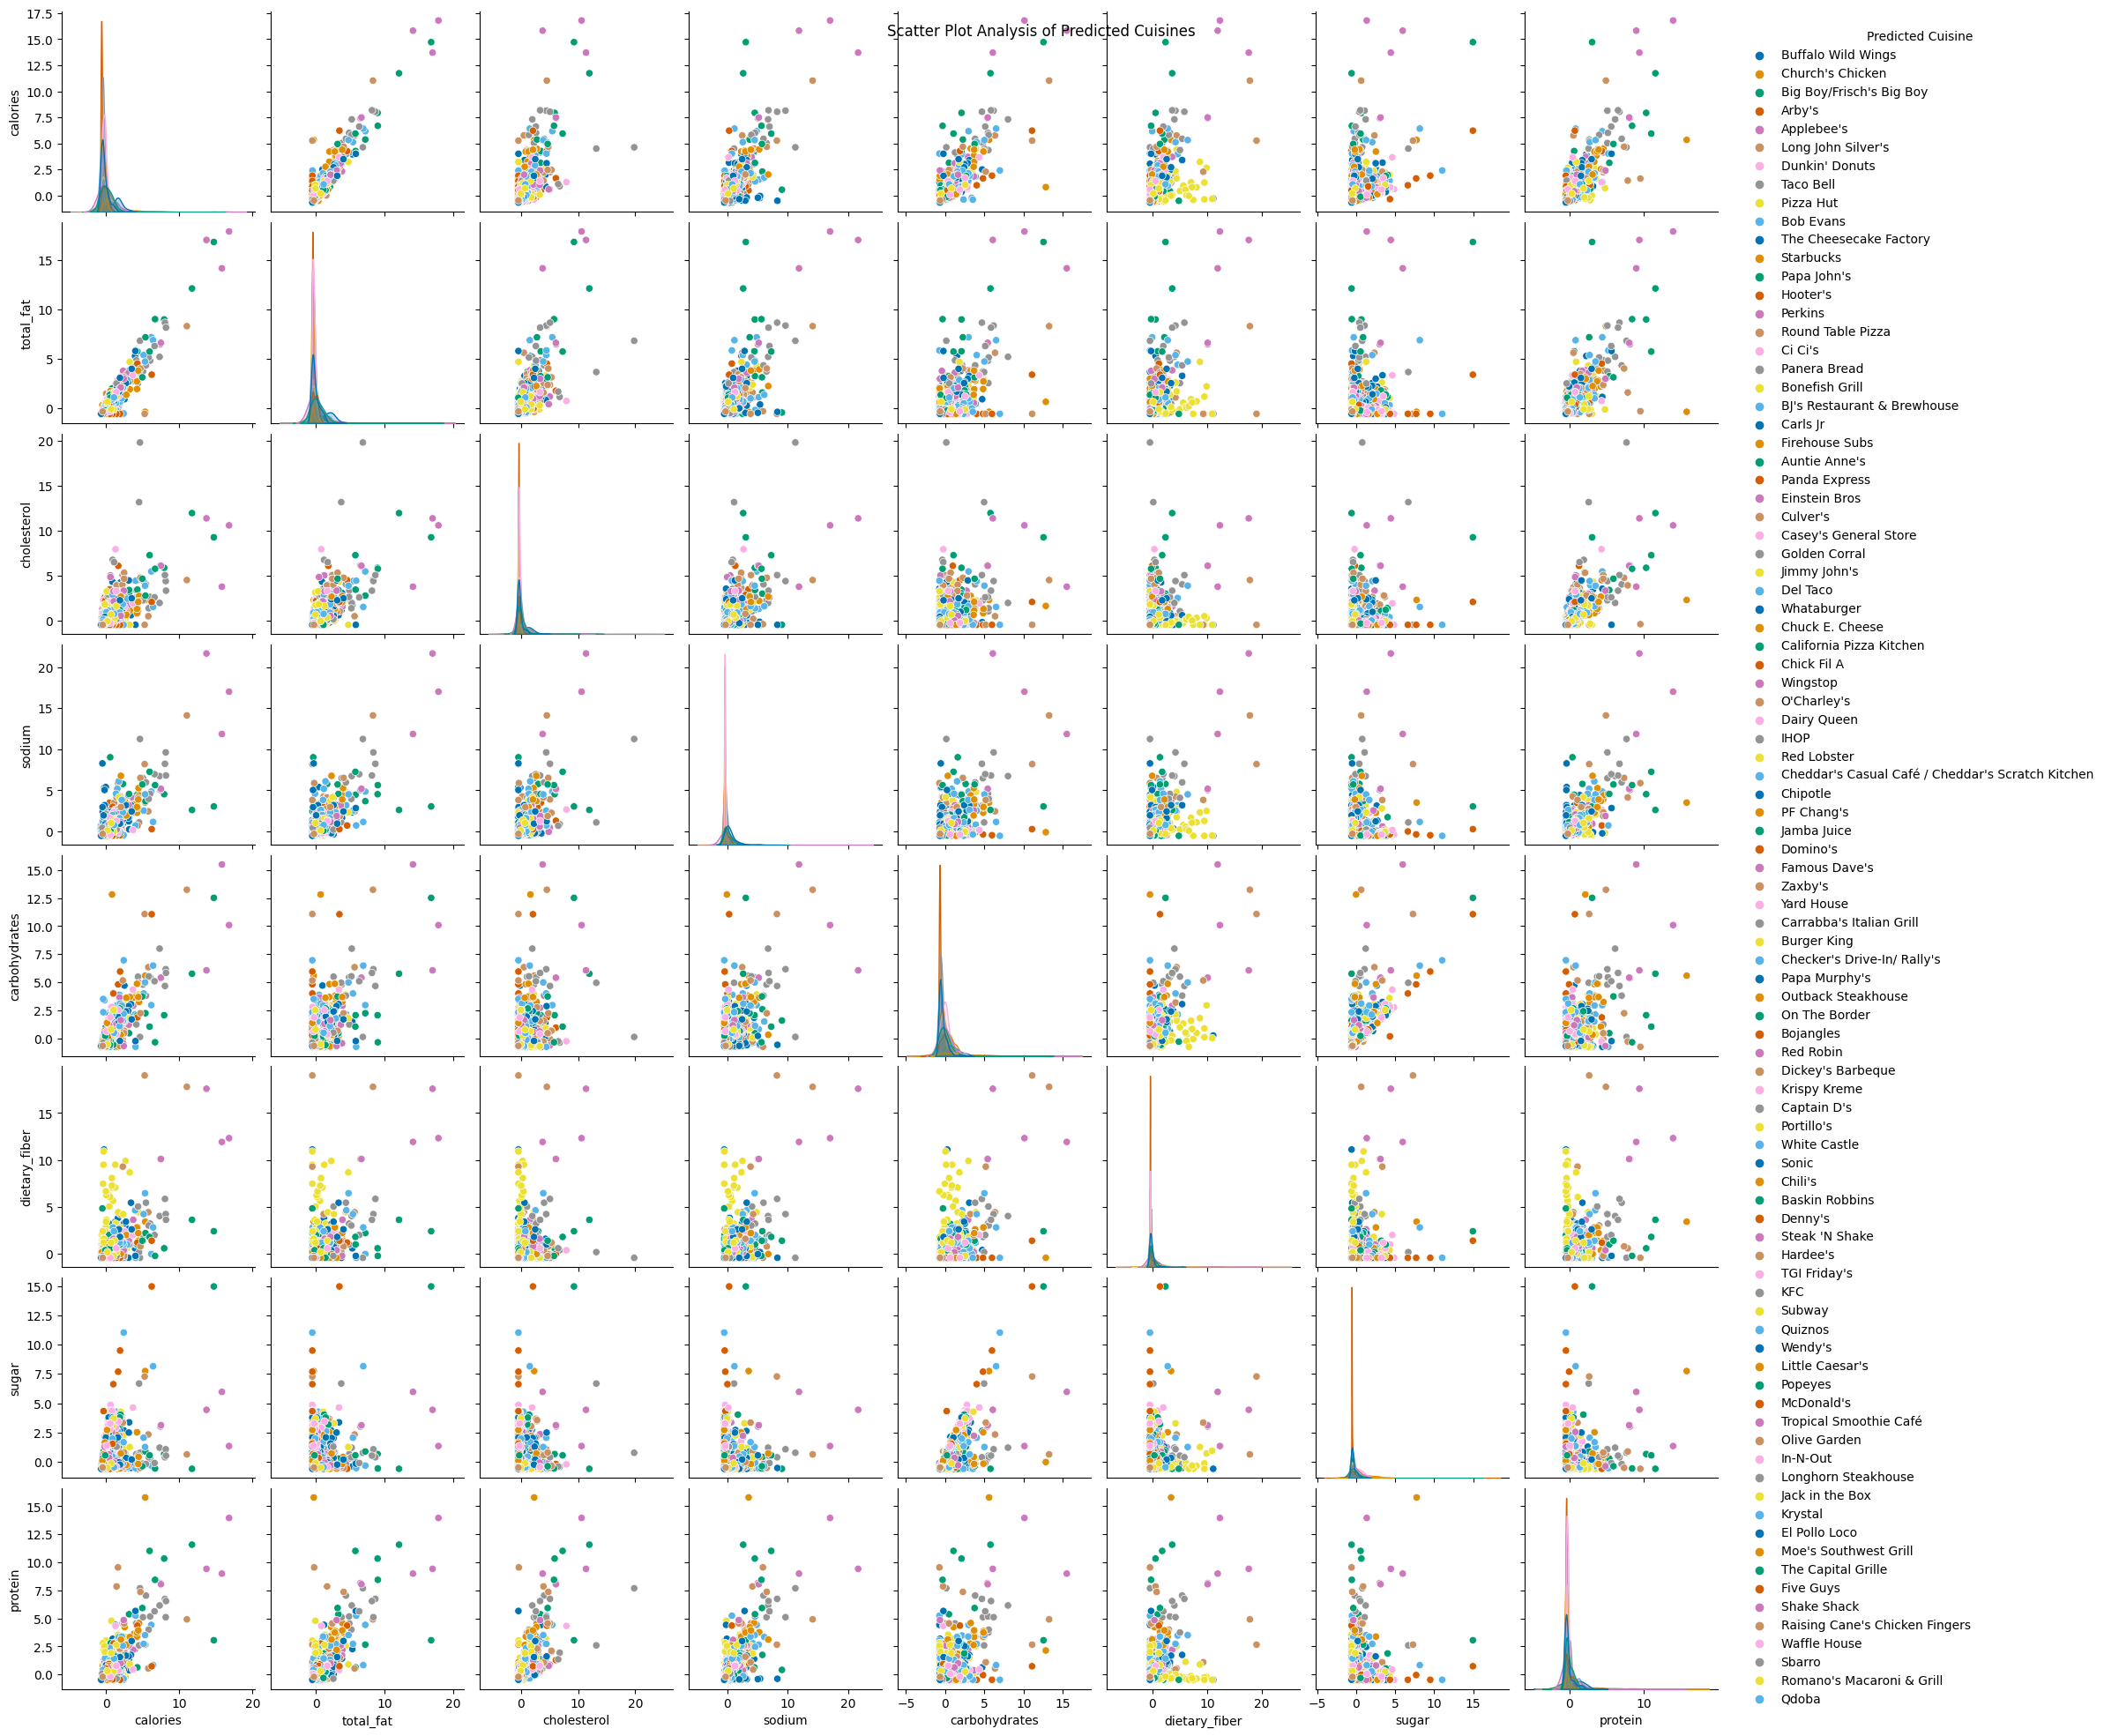

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_test and y_pred are already defined

# Create a DataFrame combining the features and predicted labels
df_pred = pd.DataFrame(X_test, columns=X.columns)
df_pred['Predicted Cuisine'] = y_pred

# Plot scatter plot for each pair of features colored by predicted cuisine
sns.pairplot(df_pred, hue='Predicted Cuisine', palette='colorblind')
plt.suptitle('Scatter Plot Analysis of Predicted Cuisines')
plt.show()
